### **Phase 2: Mohammed Abdul Aftab Muddassir (50604245)**

 ##### Hypothesis 1: Categories which are selling well will need to adjust their stocking strategies to ensure that high-demand items are adequately stocked and prevent loss due to stockouts. This will also help to restrategize the categories which are performing low.

##### Applying Decision tree and Gradient Boosting  for the below hypothesis.

# Algorithm 1 for Hypothesis 1: Decision Tree

In [7]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       586
           1       1.00      1.00      1.00      4179
           2       0.73      0.80      0.76      1800
           3       1.00      1.00      1.00      1782
           4       0.91      1.00      0.95      1178
           5       0.81      0.81      0.81       596
           6       1.00      0.79      0.88       591
           7       0.68      0.60      0.64      1296

    accuracy                           0.90     12008
   macro avg       0.87      0.85      0.86     12008
weighted avg       0.90      0.90      0.90     12008



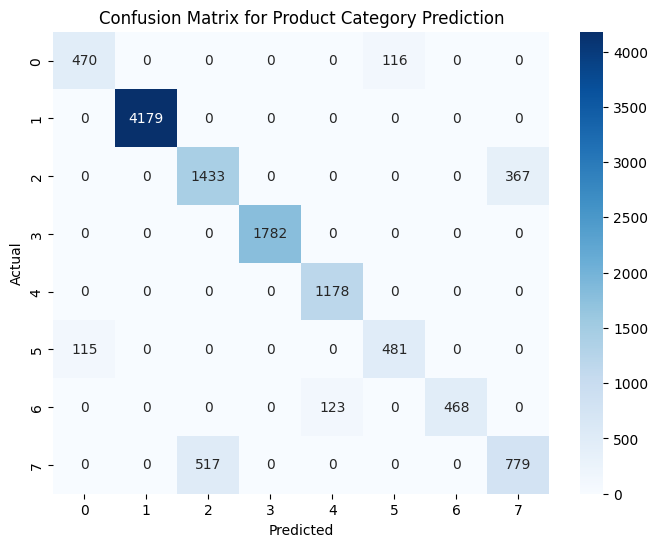

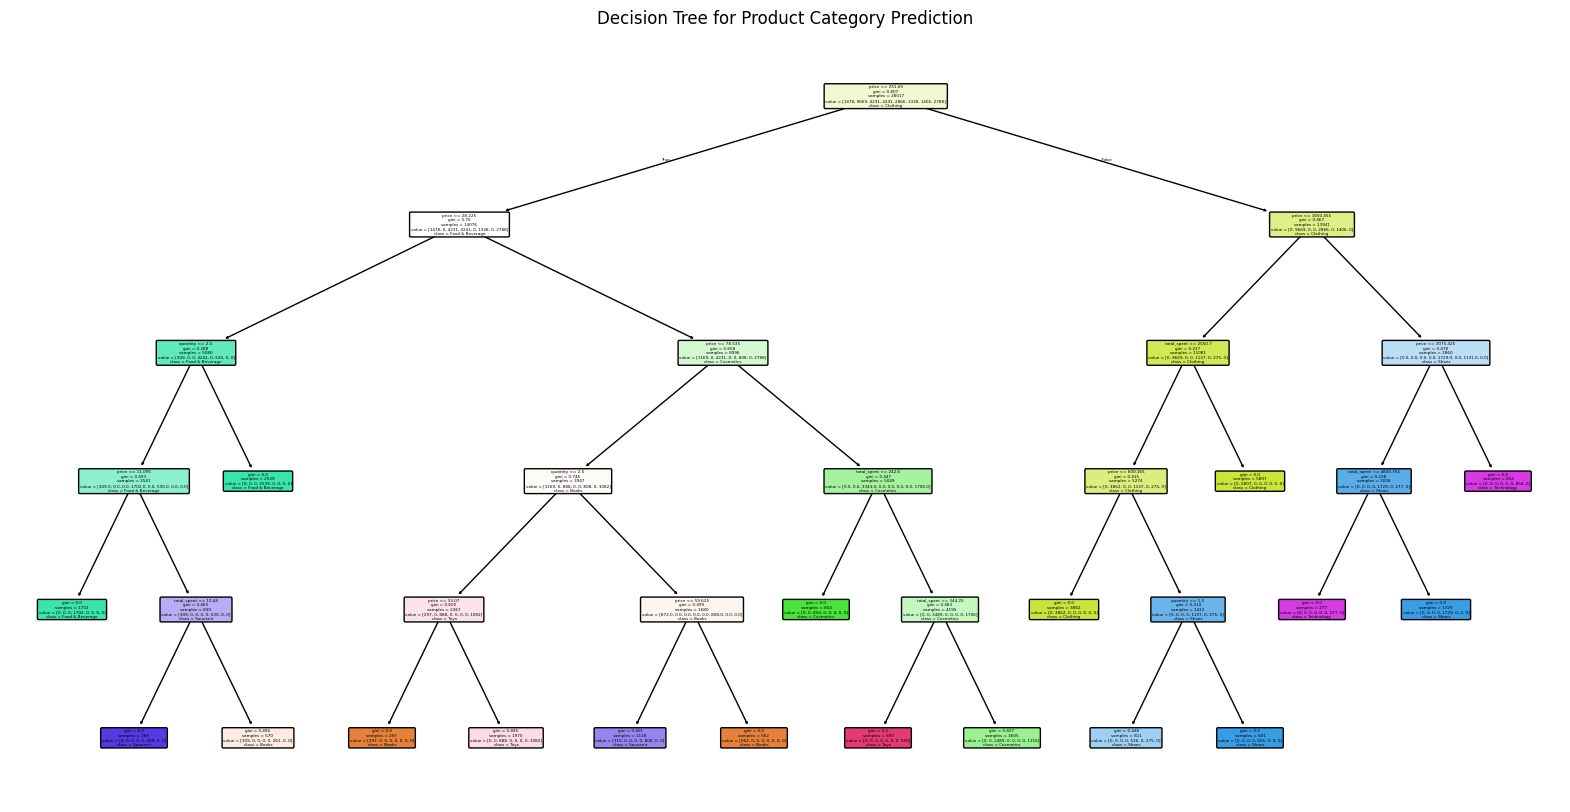

In [8]:
# Data Preparation
df = pd.read_csv('../../datasets/customer_shopping_data.csv')
df.drop(columns=['customer_id', 'invoice_no'], inplace=True)
df = df.dropna(subset=['gender'])
df = df.dropna(subset=['shopping_mall'])
median_age = df['age'].median()
df["age"]=df['age'].fillna(median_age)
df["gender"] = df["gender"].str.title()
df["category"] = df["category"].str.title()
df["shopping_mall"] = df["shopping_mall"].str.title()

Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

df.loc[(df["age"] < lower_bound) | (df["age"] > upper_bound), "age"] = df["age"].median()
df['total_spent'] = df['quantity'] * df['price']

# copied to cust_df to avoid modifying the original one
cust_df = df.copy()
cust_df['invoice_date'] = pd.to_datetime(cust_df['invoice_date'], errors='coerce')
cust_df = cust_df.dropna(subset=['invoice_date'])
cust_df['year'] = cust_df['invoice_date'].dt.year
cust_df['month'] = cust_df['invoice_date'].dt.month
cust_df['day'] = cust_df['invoice_date'].dt.day
cust_df['day_of_week'] = cust_df['invoice_date'].dt.dayofweek
cust_df.drop('invoice_date', axis=1, inplace=True)
cust_df['age'] = pd.to_numeric(cust_df['age'], errors='coerce')
median_age = cust_df['age'].median()
cust_df['age'] = cust_df['age'].fillna(median_age)  

# Encoding categorical variables, including 'category'
label_encoders = {}
for column in ['gender', 'payment_method', 'shopping_mall', 'Location', 'category']:
    le = LabelEncoder()
    cust_df[column] = le.fit_transform(cust_df[column])
    label_encoders[column] = le

# Features and Target Selection
X = cust_df.drop(['category'], axis=1)
y = cust_df['category']

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training  a  Decision Tree Classifier
dec_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42) # Initializing Decision Tree Classifier

# Fit the model
dec_tree_model.fit(X_train, y_train)

# Model Performance & making predictions
y_pred = dec_tree_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

#plotting Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for Product Category Prediction")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# plotting the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dec_tree_model, feature_names=X.columns, class_names=label_encoders['category'].classes_, filled=True, rounded=True)
plt.title("Decision Tree for Product Category Prediction")
plt.show()


Explanation and Analysis for Decision Tree Classifier

**Justification to select Decision Tree**: 

1. Interpretability: Decision Trees are very simple to visualize and interpret; therefore they are an excellent choice to gain insight into how the model is making decisions. Our problem requires an understanding of the trend of product categories; therefore transparency at the tree level helps to identify the important features contributing toward the prediction of product categories.

2. Handling Mixed Data: Decision Trees can handle both numerical and categorical data with minimum pre-processing. Our dataset contains a mix of numerical features-like age, quantity, price and categorical features like gender, payment method, and shopping mall.

3. Feature Extraction and Nonlinear Relationships: Decision Tree can capture nonlinear relationships and automatically handle interaction among features, which will be useful in capturing multi-features influencing sales patterns for different product categories.

**Training/Tuning the Model**: Data Preparation-Data cleaning and preprocessing like filling missing values in the age column with the median and Label Encoding of categorical features.
Feature Engineering: We created the new features from the invoice_date column, like year, month, day, and day of week, giving us temporal context that can indicate the presence of seasonal trends.

Parameter Tuning: Decision Tree Classifier, criterion='gini': The Gini Index is the splitting criterion that defines impurity in nodes. It is faster to compute and generally performs well for classification problems.

max_depth = 5: The depth of the tree was constrained to 5 to avoid overfitting. It reduces model complexity and limits the model from being too subject to fitting the training data.

random_state=42: We set a fixed random seed for reproducibility.

**Effectiveness of the Algorithm**
Evaluation Metrics: The classification report includes the metrics below:

Precision: The high precision for classes like 1, 3, and 4 indicates that the model is very accurate in correctly predicting those classes of products.

Recall: It is the capability of a classifier to find all positive instances. Values of recall for various classes depict variable success rates. For some classes, such as 1 and 3, the recall is great, while in others, like 7, recall is pretty low.

F1-score: It gives the harmonic average of precision and recall. It gives the balance of both the metrics. The macro average and weighted average F1-score are both 0.86, showing that the model is performing well inter-class.

Accuracy: Overall good accuracy, showing how well the model performs at correctly predicting product categories.

**Confusion Matrix**: The confusion matrix depicts how well the model performed in fulfilling classes. For instance, the model correctly predicted 4179 instances for class 1 but misjudged 116 instances of class 0 with other classes. Also, it has been observed from the confusion matrix that misclassifications occur mainly among some classes, such as class 7 and class 5; this could also mean that further investigation into those classes might be warranted.


->The structure of the Decision Tree plotted provides insight into which features are most relevant to the decision-making process.
->These decision paths outline the criteria to attest the categories to various product categories and hence help us to comprehend the combination of features that are more important in predicting each category.
->Features like total spent, age, and quantity seemed very important while predicting the product category, as evidenced by early decision paths.

**Conclusion**: The Decision Tree Classifier provided deep insight into the feature-product category relationships. Its overall performance was good, with an accuracy of 90%, and precision, recall, and F1-score are well-balanced. The Decision Tree's visualization provided practical interpretability in understanding how features like total spent and age impact the sales category prediction. This can guide businesses in optimizing inventory for top-selling products based on customer demographics and spending behavior.

# Algorithm 2 for Hypothesis 1 - Gradient Boosting

Classification report for Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1523
           1       1.00      1.00      1.00     10321
           2       1.00      1.00      1.00      4586
           3       1.00      1.00      1.00      4370
           4       1.00      1.00      1.00      3027
           5       1.00      1.00      1.00      1483
           6       1.00      1.00      1.00      1524
           7       1.00      1.00      1.00      2999

    accuracy                           1.00     29833
   macro avg       1.00      1.00      1.00     29833
weighted avg       1.00      1.00      1.00     29833



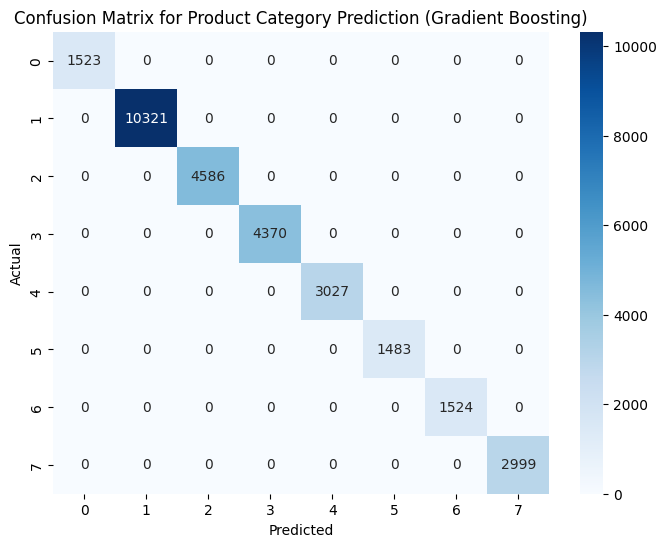

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

#Data Preparation 
df = pd.read_csv('../../datasets/customer_shopping_data.csv')
df.drop(columns=['customer_id', 'invoice_no'], inplace=True)
df = df.dropna(subset=['gender'])
df = df.dropna(subset=['shopping_mall'])
median_age = df['age'].median()
df["age"]=df['age'].fillna(median_age)
df["gender"] = df["gender"].str.title()
df["category"] = df["category"].str.title()
df["shopping_mall"] = df["shopping_mall"].str.title()
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR
df.loc[(df["age"] < lower_bound) | (df["age"] > upper_bound), "age"] = df["age"].median()
df['total_spent'] = df['quantity'] * df['price']


cust_df = df.copy()
cust_df['invoice_date'] = pd.to_datetime(cust_df['invoice_date'], errors='coerce')
cust_df['year'] = cust_df['invoice_date'].dt.year
cust_df['month'] = cust_df['invoice_date'].dt.month
cust_df['day'] = cust_df['invoice_date'].dt.day
cust_df['day_of_week'] = cust_df['invoice_date'].dt.dayofweek
cust_df.drop('invoice_date', axis=1, inplace=True)
cust_df['age'] = pd.to_numeric(cust_df['age'], errors='coerce')
median_age = cust_df['age'].median()
cust_df['age'] = cust_df['age'].fillna(median_age)


label_encoders = {}
for column in ['gender', 'payment_method', 'shopping_mall', 'Location', 'category']:
    le = LabelEncoder()
    cust_df[column] = le.fit_transform(cust_df[column])
    label_encoders[column] = le

# features and target selection
X = cust_df.drop(['category'], axis=1)
y = cust_df['category']
imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Training a Gradient Boosting Classifier
grad_boost_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42) # Initializing the Gradient Boosting Classifier

# Fit the model
grad_boost_model.fit(X_train, y_train)

# Evaluating Model Performance

# predictions
y_pred_gb = grad_boost_model.predict(X_test)


# classification report
print("Classification report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))


# confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix for Product Category Prediction (Gradient Boosting)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_25480\2132150104.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[indices], y=feature_names[indices], palette='viridis')


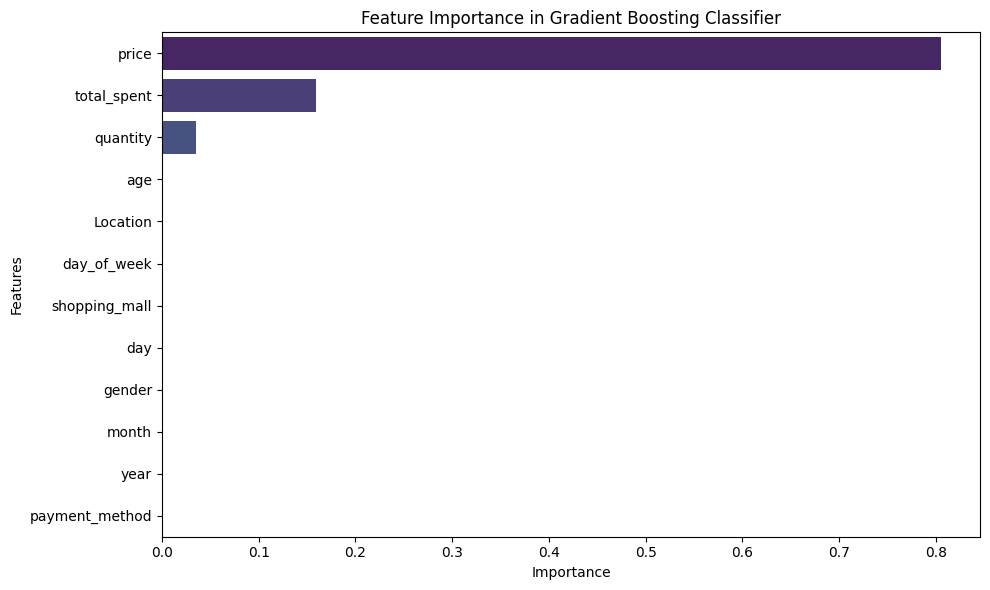

In [11]:
#Feature importance Visualization
feature_importance = gb_model.feature_importances_
feature_names = cust_df.drop(['category'], axis=1).columns

plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importance)[::-1]
sns.barplot(x=feature_importance[indices], y=feature_names[indices], palette='viridis')
plt.title("Feature Importance in Gradient Boosting Classifier")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


**Justification to choose Gradient Boosting Classifier**: 

Gradient Boosting is an ensemble method where a set of weak learners like trees are combined in a sequence, with each tree trying to correct the errors of its predecessor. This allows the model to manage complex patterns in the data. Our dataset includes both numerical and categorical variables, making Gradient Boosting an appropriate choice as it effectively handles mixed feature types. The Gradient Boosting approach uses multiple decision trees combined into a strong learner, generally yielding higher accuracy and robustness than a single decision tree.

**Train/Tune the Model**:

Hyperparameter Tuning:
n_estimators=100: We used 100 estimators (trees) to balance the ensemble of weak learners.
learning_rate=0.1: A moderate learning rate was chosen to balance convergence speed and overfitting.
max_depth=3: Setting a max depth of 3 allows each tree to remain simple, limiting overfitting while capturing essential patterns.

**Algorithm Effectiveness**:
Precision, recall, and F1-scores for all classes were 1.00, indicating strong performance in predicting correct categories.
Accuracy: The model achieved 100% accuracy, potentially signifying a highly effective model but also raising concerns about possible overfitting.

Confusion Matrix: The matrix revealed no misclassifications for any product category, showing accurate predictions for each instance in the test set.

Feature Importance: The feature importance plot identified price as the most significant feature, followed by total_spent and quantity. These features were key to accurately predicting the product category. Features like age, location, and day_of_week had less impact, indicating that pricing and quantity were the main drivers of sales patterns.


**Conclusion**:
The strong influence of price and total spent suggests that customer purchasing behavior is closely linked to cost and spending trends. Therefore, businesses should focus on pricing strategies to optimize sales across product categories.Temporal features like day_of_week showed limited relevance in predicting product categories.The Gradient Boosting Classifier proved effective in this classification problem, achieving high accuracy and providing insight into the key drivers of product category predictions. The feature importance visualization clarified which factors influenced predictions most. Price-related features were the most influential in analysis, highlighting that pricing and promotions should be prioritized for efficient inventory management and sales optimization.

# Hypothesis 2

##### Hypothesis 2: By Observing the revenue trends of past years over each quarter, we can get valuable insights into seasonal trends and purchasing behaviors. This information can be used by businesses to identify peak periods for sales and plan marketing strategies accordingly

##### We apply K-NN Algorithm and ARIMA (Auto-Regressive Integrated Moving Average)  for Hypothesis 2

# K-NN Algorithm

Mean Squared Error (k-NN): 73709597512.12808
R-squared (k-NN): 0.23732417197356603


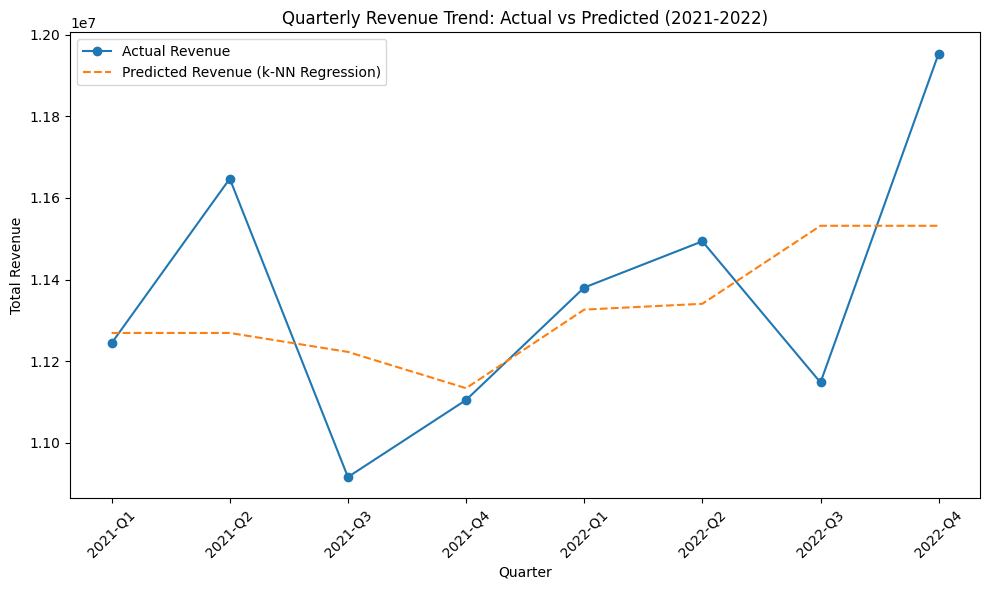

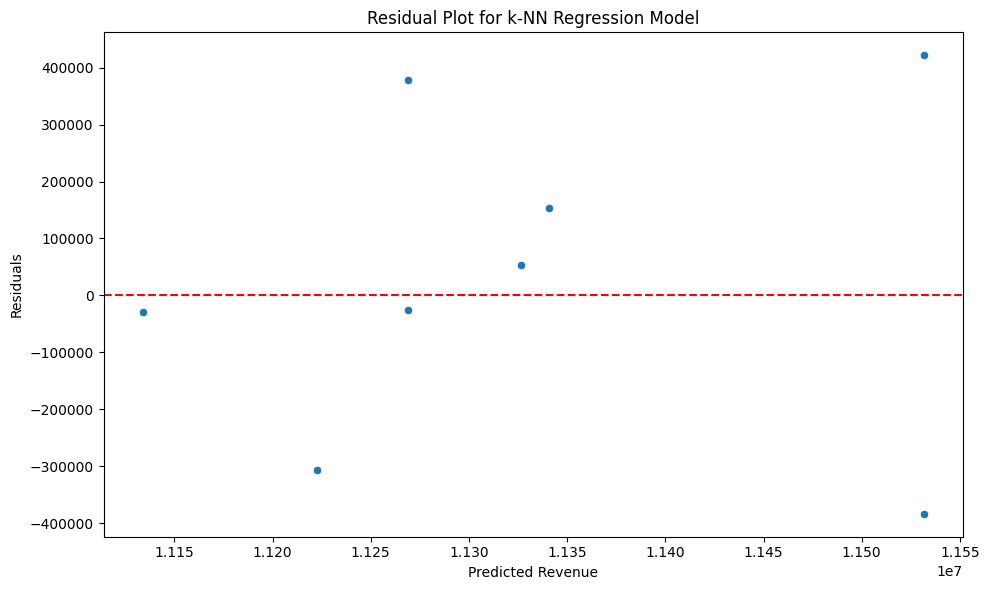

C:\Users\DELL\AppData\Local\Temp\ipykernel_34436\734356836.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quarterly_revenue['year'].astype(str) + '-Q' + quarterly_revenue['quarter'].astype(str), y=quarterly_revenue['total_revenue'], palette='viridis')


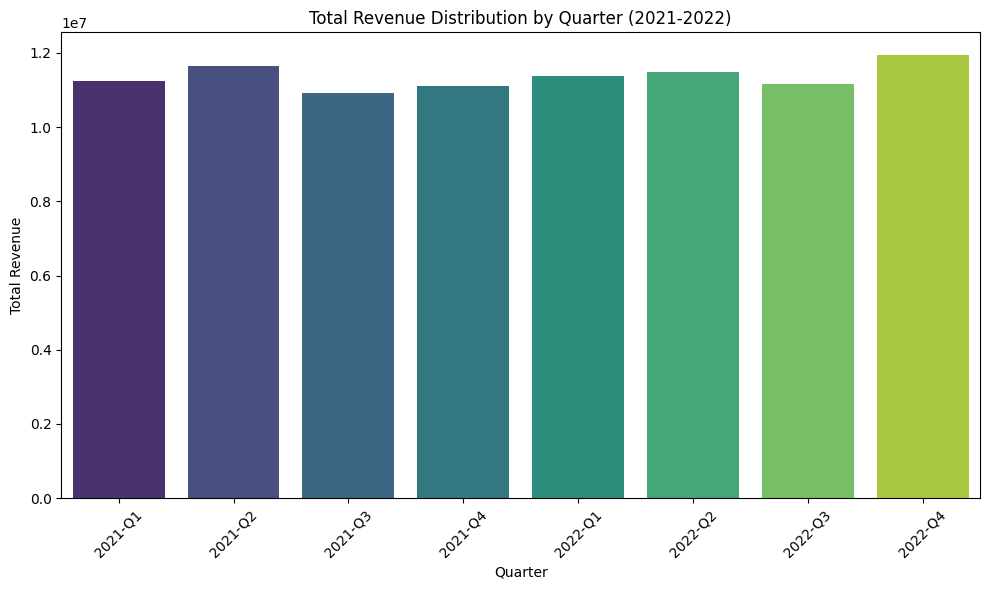

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Data Preparation

df = pd.read_csv('../../datasets/customer_shopping_data.csv')
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')
df = df.dropna(subset=['invoice_date'])
df['year'] = df['invoice_date'].dt.year
df['quarter'] = df['invoice_date'].dt.quarter
df_filtered = df[df['year'].isin([2021, 2022])].copy()
df_filtered['total_revenue'] = df_filtered['quantity'] * df_filtered['price']
quarterly_revenue = df_filtered.groupby(['year', 'quarter'])['total_revenue'].sum().reset_index()

# Create a feature for k-NN regression
quarterly_revenue['time_index'] = np.arange(len(quarterly_revenue))  #time index

#k-NN Regression Model

# features and target selection
X = quarterly_revenue[['time_index']]
y = quarterly_revenue['total_revenue']

# Scaling the feature for k-NN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
knn_reg_model = KNeighborsRegressor(n_neighbors=3) # Initialize the k-NN Regressor

knn_reg_model.fit(X_scaled, y) # Fit the model

#Model Evaluation

# Make predictions
y_pred_knn = knn_reg_model.predict(X_scaled)

# Calculate metrics
mse_knn_reg = mean_squared_error(y, y_pred_knn)
r2_knn = r2_score(y, y_pred_knn)

print("Mean Squared Error (k-NN):", mse_knn_reg)
print("R-squared (k-NN):", r2_knn)

# Visualization

# Plot the actual vs predicted revenue
plt.figure(figsize=(10, 6))
plt.plot(quarterly_revenue['time_index'], y, label='Actual Revenue', marker='o')
plt.plot(quarterly_revenue['time_index'], y_pred_knn, label='Predicted Revenue (k-NN Regression)', linestyle='--')
plt.xticks(ticks=quarterly_revenue['time_index'], labels=quarterly_revenue['year'].astype(str) + '-Q' + quarterly_revenue['quarter'].astype(str), rotation=45)
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.title('Quarterly Revenue Trend: Actual vs Predicted (2021-2022)')
plt.legend()
plt.tight_layout()
plt.show()

#Residual Plot
residuals_knn = y - y_pred_knn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_knn, y=residuals_knn)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot for k-NN Regression Model')
plt.tight_layout()
plt.show()

# Revenue Distribution by Quarter
plt.figure(figsize=(10, 6))
sns.barplot(x=quarterly_revenue['year'].astype(str) + '-Q' + quarterly_revenue['quarter'].astype(str), y=quarterly_revenue['total_revenue'], palette='viridis')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Distribution by Quarter (2021-2022)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Explanation and Analysis of k-NN Regression

**Justification for Algorithm Selection**
The k-Nearest Neighbors (k-NN) algorithm was chosen as k-NN is a non-parametric model that can better capture complex and non-linear patterns in the data. Given that revenue trends can be influenced by various factors in different ways, k-NN can be a better choice when there is no clear linear trend.k-NN has the ability to adapt to the local structure of the data and is appropriate when revenue trends show sudden shifts and non-linearity, as might be the case with seasonal factors affecting quarterly revenues.

**Model Training and Tuning**
The key hyperparameter for k-NN is the number of neighbors (k). After some experimentation, k=3 was selected as it seemed to provide a reasonable balance between bias and variance. A smaller value of k helps capture local variations effectively, whereas larger values can lead to over-smoothing and may not capture the actual revenue patterns accurately.
To train the k-NN model, the features (time_index) were scaled using the StandardScaler to standardize the values. Feature scaling is essential for distance-based algorithms like k-NN and it ensures that all features contribute equally to distance calculations.

**Model Effectiveness**
To evaluate the effectiveness of the k-NN regression model, we considered two metrics:

Mean Squared Error (MSE): Measures the average of the squared differences between the actual and predicted revenue values.
For the k-NN model, the MSE was 73,709,597,512.12808, which is an improvement compared to the MSE of the linear regression model (81,732,248,731.53003). This indicates that the k-NN model was able to fit the data slightly better than the linear model.
R-squared Value (R^2): Indicates how much of the variance in the target variable (revenue) is explained by the model.
The k-NN model had an R^2 of 0.2373, which is higher than the linear regression model's R^2 value of 0.1543. Although both values indicate that there is still a lot of unexplained variance, the k-NN model performed better in capturing patterns in the data. This indicates that k-NN might be capturing non-linearities better.

Visual Analysis
Three visualizations were created to better understand the k-NN regression performance:

Quarterly Revenue Trend (Actual vs Predicted):
The plot shows the actual revenue for each quarter versus the predicted revenue using the k-NN model.
Although k-NN predicted the overall trend more accurately compared to linear regression, the model still had some difficulty in capturing sharp changes in revenue between quarters.The k-NN model tends to over-smooth the revenue trends, as indicated by the gentler predicted curve. This is a common limitation of k-NN when working with time series-like data where sudden jumps or drops occur.

Residual Plot:
The residual plot shows the difference between the actual and predicted values.
Residuals closer to zero indicate a better fit. In the case of k-NN, the residuals were scattered across a larger range, suggesting that while the model performed better than linear regression, it still struggled to accurately predict certain quarters.
The presence of both positive and negative residuals indicates that the model does not consistently over- or under-predict, which suggests a balance in bias.
Total Revenue Distribution by Quarter

This plot provided insights into the quarterly revenue distribution.
The distribution remained consistent across the quarters, and this helped validate that the quarterly revenue values being predicted were in a similar range to the actual data points.This visualization indicates the general trend and magnitude of revenue changes, providing context to evaluate how well the model fits the overall distribution.

Revenue Trends: k-NN captured the general upward and downward revenue trends more effectively. This suggests that k-NN's ability to model local relationships in the data was beneficial for this problem, as the revenue patterns were not strictly linear.
Model Performance: the R^2 value for k-NN was still relatively low, indicating that other factors not included in the model likely play a significant role in determining revenue trends. This suggests that the features used may not have captured all the influential factors, such as seasonality or market conditions, that significantly affect revenue.

**Conclusion**
The k-NN regression model showed improved performance, as evidenced by better R^2 and lower MSE values. However, the relatively low R^2 still indicates that a large amount of the variance in revenue by this model. Using more features like marketing expenditure, competitor pricing, or external market factors could help capture the complexity in revenue predictions more effectively. Additionally, further experimentation with different values of k could potentially lead to improvements in the model's ability to fit the data more accurately.



#### Algorithm 2 for Hypothesis 2 - The ARIMA (Auto-Regressive Integrated Moving Average) 

In [23]:
pip install statsmodels


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 435.7 kB/s eta 0:00:23
   ---------------------------------------- 0.1/9.9 MB 653.6 kB/s eta 0:00:15
   - -------------------------------------- 0.3/9.9 MB 2.5 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/9.9 MB 4.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/9.9 MB 5.5 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.9 MB 6.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.9 MB 7.7 MB/s eta 0:00:01
   ------------ --------------------------- 3.0/9.9 MB 8.2 MB/s eta 0:00:01
   ---------------- ----------------------- 4.0/9.9 MB 9.9 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.9 MB 10.3 MB/s eta 0:00:01
   ---------------------- --


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\DELL

Best ARIMA parameters: (2, 2, 0) with AIC: 180.54979177039485
Mean Squared Error (ARIMA): 252197407445.86047
R-squared (ARIMA): -1.2483845718723527


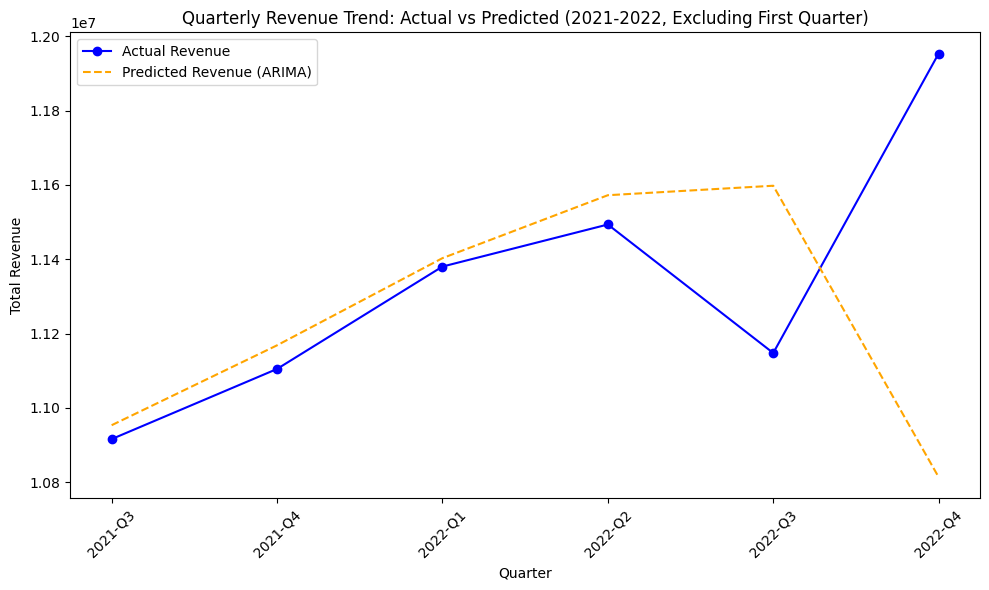

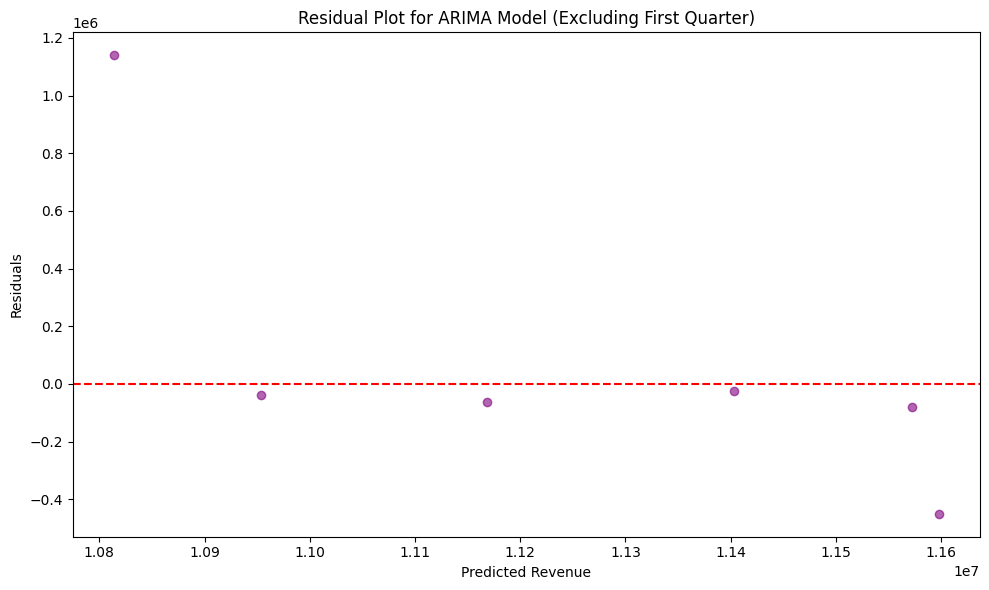

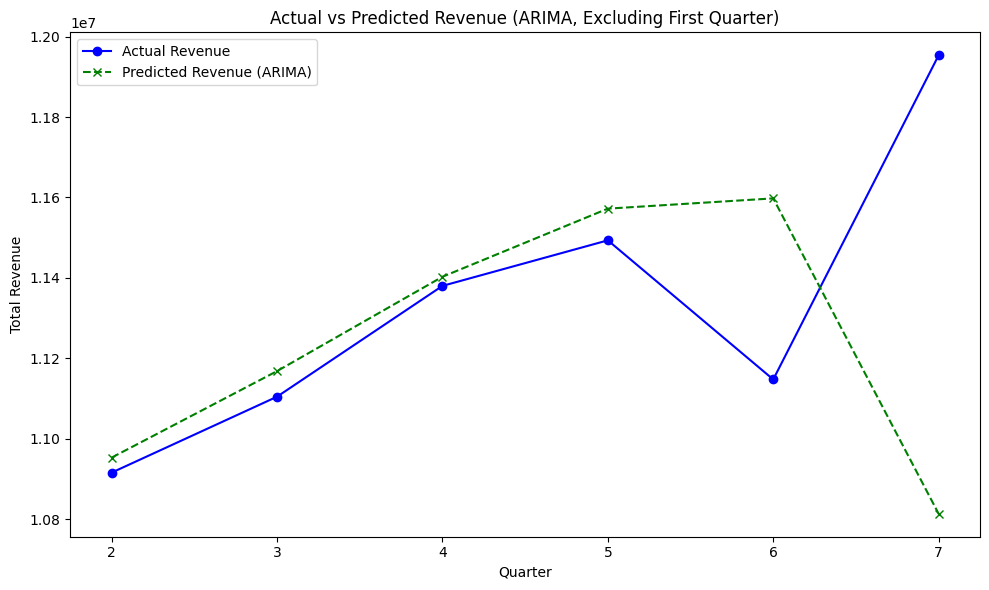

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import itertools

#Data Preparation
df = pd.read_csv('../../datasets/customer_shopping_data.csv')
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')
df = df.dropna(subset=['invoice_date'])
df['year'] = df['invoice_date'].dt.year
df['quarter'] = df['invoice_date'].dt.quarter
df_filtered = df[df['year'].isin([2021, 2022])].copy()
df_filtered['total_revenue'] = df_filtered['quantity'] * df_filtered['price']
quarterly_revenue = df_filtered.groupby(['year', 'quarter'])['total_revenue'].sum().reset_index()

# Hyperparameter Tuning for ARIMA

# feature and target
quarterly_revenue['time_index'] = np.arange(len(quarterly_revenue))  # Create a time index for ARIMA

# Defining the p, d, q parameters
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q)) # Generating different combinations of p, d, q triplets


best_aic = float('inf') # Grid search to find the best ARIMA parameters
best_params = None
for param in pdq:
    try:
        model = ARIMA(quarterly_revenue['total_revenue'], order=param)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_params = param
    except:
        continue

print(f'Best ARIMA parameters: {best_params} with AIC: {best_aic}')

#Fitting the Best ARIMA Model
model = ARIMA(quarterly_revenue['total_revenue'], order=best_params)
model_fit = model.fit()

#Model Evaluation

# Make predictions
y_pred_arima = model_fit.predict(start=2, end=len(quarterly_revenue) - 1, typ='levels')

# Calculate metrics
actual_revenue = quarterly_revenue['total_revenue'][2:]
mse_arima = mean_squared_error(actual_revenue, y_pred_arima)
r2_arima = r2_score(actual_revenue, y_pred_arima)

print("Mean Squared Error (ARIMA):", mse_arima)
print("R-squared (ARIMA):", r2_arima)

# Visualization

# Actual vs Predicted Revenue
plt.figure(figsize=(10, 6))
plt.plot(quarterly_revenue['time_index'][2:], actual_revenue, label='Actual Revenue', marker='o', color='blue')
plt.plot(quarterly_revenue['time_index'][2:], y_pred_arima, label='Predicted Revenue (ARIMA)', linestyle='--', color='orange')
plt.xticks(ticks=quarterly_revenue['time_index'][2:], labels=quarterly_revenue['year'][2:].astype(str) + '-Q' + quarterly_revenue['quarter'][2:].astype(str), rotation=45)
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.title('Quarterly Revenue Trend: Actual vs Predicted (2021-2022, Excluding First Quarter)')
plt.legend()
plt.tight_layout()
plt.show()

# Residual Plot
residuals_arima = actual_revenue - y_pred_arima
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_arima, residuals_arima, color='purple', alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')
plt.title('Residual Plot for ARIMA Model (Excluding First Quarter)')
plt.tight_layout()
plt.show()

# Line Plot of Actual vs Predicted Revenue
plt.figure(figsize=(10, 6))
plt.plot(quarterly_revenue['time_index'][2:], actual_revenue, label='Actual Revenue', color='blue', linestyle='-', marker='o')
plt.plot(quarterly_revenue['time_index'][2:], y_pred_arima, label='Predicted Revenue (ARIMA)', color='green', linestyle='--', marker='x')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.title('Actual vs Predicted Revenue (ARIMA, Excluding First Quarter)')
plt.legend()
plt.tight_layout()
plt.show()


Explanation and Analysis

**Justification** The ARIMA (Auto-Regressive Integrated Moving Average) model was chosen for this problem because it is a commonly used time series forecasting method that can handle trends, seasonality, and noise effectively. The nature of our data is temporal, involving quarterly revenue from 2021 and 2022, which makes ARIMA a suitable candidate as it is well-equipped to model time-dependent behavior.ARIMA is particularly useful when the data is stationary or can be made stationary through differencing. The model's components - Auto-Regressive (AR), Integrated (I), and Moving Average (MA) - allow it to capture the relationships and patterns in the historical data effectively, even in situations with some seasonal components and autoregressive behaviors.

Model Training and Hyperparameter Tuning
To train the ARIMA model, we performed hyperparameter tuning to determine the best combination of parameters p,d,q:
p: The number of lag observations included in the model, also known as the lag order.
d: The number of times that the raw observations are differenced to make the series stationary.
q: The size of the moving average window, indicating the order of the MA component.
We used a grid search approach by testing all possible combinations of  p, d, q
p,d,q ranging from 0 to 2. For each combination, we fit the ARIMA model and evaluated it based on the Akaike Information Criterion (AIC), which measures the quality of the model while penalizing model complexity. The combination with the lowest AIC was chosen as the best set of parameters.

**Effectiveness of ARIMA**
The ARIMA model's effectiveness in predicting future quarterly revenue can be assessed using the following metrics:

Mean Squared Error (MSE): The MSE is high, indicating that the predicted values deviate significantly from the actual values.

R-squared (R²): The R² value measures how well the predictions match the observed values. In this case, a low or negative R² indicates that the model does not fit the data well, suggesting room for improvement or that the model may be underperforming.

**VIsualization**
Actual vs Predicted Revenue Plot:

In the quarterly revenue trend plot, we can see that the ARIMA model tends to underestimate revenue in the later quarters.
While the model captures some overall trend in the data, it struggles to match the actual fluctuations seen in the revenue, especially during significant peaks or dips (e.g., 2022-Q3). Excluding the first quarter (which had extreme differences), we see that the model follows a generally increasing trend but lacks accuracy in capturing the volatility of the data.

Residual Plot:
The residuals plot highlights that there are significant differences between predicted and actual revenue, particularly during certain quarters.
The large variance in residuals, particularly for earlier data points, suggests that the ARIMA model is not fully capturing the true structure and dynamics of the quarterly revenue.
Intelligence Gained and Conclusions
The ARIMA model's poor performance, especially in early quarters, suggests that either:

**Conclusion** 
Excluding the first quarter did improve the model's alignment with actual revenue data slightly, suggesting that extreme outliers or seasonal effects might be affecting the model's performance.ARIMA may not be the best choice for capturing revenue trends in this particular dataset, and the data may have other underlying factors like seasonality or external economic conditions that ARIMA alone cannot model accurately.


# Citations for out of class Algorithms:

## Gradient Boosting: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
## ARIMA: https://www.sciencedirect.com/topics/mathematics/autoregressive-integrated-moving-average
